In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
from statistics.cramer import categorical_relation_with, cross_categorical
from statistics.cat_to_num import apply_across
from statistics.cat_to_num import spearman_with

from tools.datasets import get_boston, get_heart, get_houses, get_prudential

data, labels, continuous, discrete, dummy, categorical, target, missing = get_boston()
# data, labels, continuous, discrete, dummy, categorical, target, missing = get_heart()
# data, labels, continuous, discrete, dummy, categorical, target, missing = get_houses()
# data, labels, continuous, discrete, dummy, categorical, target, missing = get_prudential()

In [20]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,1.412991,13.044702,10.285265,0.089404,0.542042,6.326970,66.524834,3.964832,7.649007,373.480132,18.244702,367.747450,11.569536,23.723510
std,2.503988,24.466273,6.787231,0.285800,0.117529,0.671925,27.637920,2.082607,7.447445,151.413050,2.161922,71.165255,6.269916,8.977447
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,6.500000,1.129600,1.000000,188.000000,13.000000,0.320000,2.470000,6.300000
25%,0.069365,0.000000,4.935000,0.000000,0.447000,5.890500,42.325000,2.290250,4.000000,273.000000,17.000000,376.972500,6.580000,18.325000
50%,0.191030,0.000000,8.140000,0.000000,0.515000,6.229000,72.800000,3.495200,5.000000,307.000000,18.600000,391.955000,10.175000,21.700000
75%,1.145435,20.000000,18.100000,0.000000,0.605000,6.629500,91.875000,5.213925,7.000000,403.000000,20.200000,395.975000,15.442500,26.925000
max,9.966540,95.000000,27.740000,1.000000,0.871000,8.704000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,30.810000,50.000000


In [133]:
print("numerical: {}, categorical: {}, binary: {}".format(
    len(continuous)+len(discrete), len(categorical), len(dummy)))

numerical: 10, categorical: 0, binary: 1


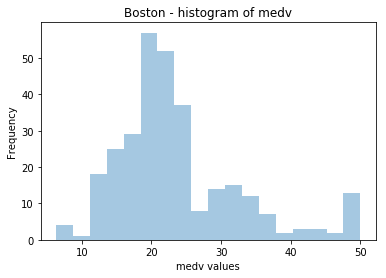

In [54]:
sns_plot = sns.distplot(labels, kde=False)
sns_plot.set_title("Boston - histogram of medv")
sns_plot.set_ylabel("Frequency")
sns_plot.set_xlabel("medv values")
sns_plot.get_figure().savefig('./figures/analysis/boston_target.png')

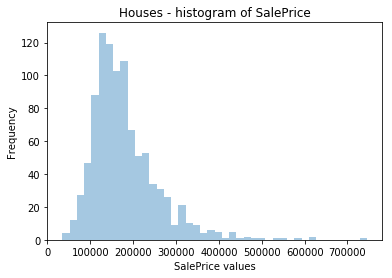

In [52]:
sns_plot = sns.distplot(labels, kde=False)
sns_plot.set_title("Houses - histogram of SalePrice")
sns_plot.set_ylabel("Frequency")
sns_plot.set_xlabel("SalePrice values")
sns_plot.get_figure().savefig('./figures/analysis/houses_target.png')

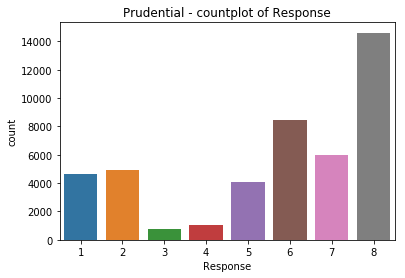

In [57]:
sns_plot = sns.countplot(labels)
sns_plot.set_title("Prudential - countplot of Response")
# sns_plot.set_ylabel("Frequency")
sns_plot.set_xlabel("Response")
sns_plot.get_figure().savefig('./figures/analysis/prudential_target.png')

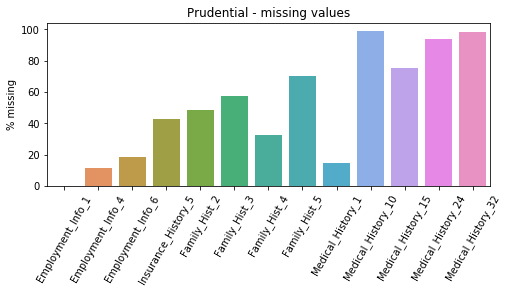

In [125]:
null_cols = data.isnull().sum()
missing = null_cols[null_cols != 0] * 100 / data.shape[0]
# data.dtypes[null_cols != 0] 

fig, ax = plt.subplots(figsize=(7,4))
sns_plot = sns.barplot(missing.index, missing.values, ax=ax)
plt.xticks(rotation=60)
# fig.tight_layout()
plt.tight_layout()
sns_plot.set_ylabel("% missing")
sns_plot.set_title("Prudential - missing values")
sns_plot.get_figure().savefig('./figures/analysis/prudential_missing.png')

In [104]:
null_cols = data.isnull().sum()
null_cols[null_cols != 0] * 100 / data.shape[0]
data.dtypes[null_cols != 0]

Employment_Info_1      float64
Employment_Info_4      float64
Employment_Info_6      float64
Insurance_History_5    float64
Family_Hist_2          float64
Family_Hist_3          float64
Family_Hist_4          float64
Family_Hist_5          float64
Medical_History_1      float64
Medical_History_10     float64
Medical_History_15     float64
Medical_History_24     float64
Medical_History_32     float64
dtype: object